# Binomi, Poisson, Gauss, plot theoretical distributions

In this notebook, we'll simulate the motorcycle micromort question. The shape of the numerical answer will give you a hint for what the analytical answer will be. You might be surprised how easy it is, in the end.

You can either run this in binder
https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=BinomiPoissonGauss.ipynb , 

or - much, much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/). 

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...)

Alternatively, you can download the entire github repository. Open a terminal window. Go to the directory where you want a copy of this github repository to live on your computer. Then execute the command:

git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

(alternatively, go to https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath and find the green "Code" button and take it from there)

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.

First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's draw graphs according to each of these distributions.

In [2]:
# Beware: these implementations of binomial and Poisson will only work for small values of N and lambda.
# For large values (larger than about 100), the factorial calculation will blow up. 
# There are of course ways around this, but preferred not to make code more complicated by numerical tricks.

def binomial(N, p):
    r    = np.arange(0, N, dtype=int)
    n_chose_r = [np.math.comb(N, k) for k in r]
    Prob = p**r * (1-p)**(N-r) *  n_chose_r   ## np.math.comb(N, r) #np.math.factorial(N)/(np.math.factorial(N-r)*np.math.factorial(r))
    return r, Prob

def Poisson(mean):
    r = np.arange(0, mean + 5*sqrt(mean), 1)
    rfac = [np.math.factorial(k) for k in r]
    Prob = np.exp(-mean) * mean**r / rfac
    return r, Prob

def Gauss(mean, sigma):
    x = np.linspace(mean - 5*sigma, mean + 5*sigma, 1000)
    pull = (x - mean)/sigma
    Prob = 1./(np.sqrt(2*pi)*sigma)*np.exp(-0.5*pull*pull)
    return x, Prob


Plot binomial

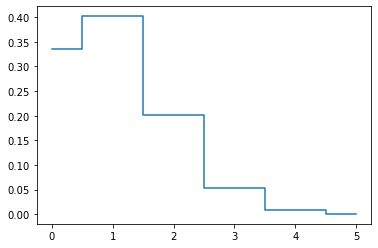

In [3]:
xb, yb = binomial(N=6, p=1/6)
plt.plot(xb, yb, ds='steps-mid')
plt.show()

Plot Poisson:

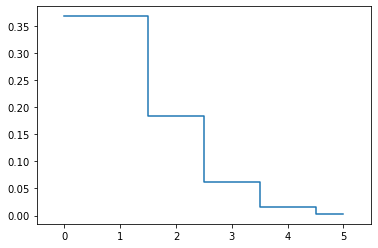

In [13]:
xp,yp  = Poisson(mean=1)
plt.plot(xp,yp, ds='steps-mid')
plt.show()

Plot Gauss

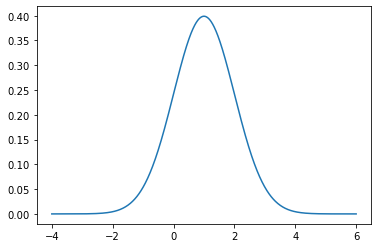

In [5]:
xg,yg  = Gauss(1, 1)
plt.plot(xg,yg)
plt.show()

Let's plot them all on top of each other, with compatible parameters

In [6]:
def PlotAll(NumTries, p_success):

    mean   = NumTries*p_success
    sigmaB = sqrt(NumTries*p_success*(1.0-p_success))
    sigmaP = sqrt(mean)

    xb, yb  = binomial(NumTries, p_success)
    plt.plot(xb, yb, ds='steps-mid', linewidth=4, c='red')
    xp,yp   = Poisson(mean)
    plt.plot(xp, yp, ds='steps-mid', linewidth=4, c='orange')
    xgb,ygb = Gauss(mean, sigmaB)
    plt.plot(xgb, ygb, linewidth=2, c='green')
    xgp,ygp = Gauss(mean, sigmaP)
    plt.plot(xgp, ygp, linewidth=2, c='blue')

    plt.show()
    print("Binomial (red), Poisson (orange), Gaussian with binomial error (green), Gaussian with poisson error (blue)"
          , "\nfor N=", NumTries, "p=", p_success
          , ",lambda=mu=N*p=", NumTries*p_success
          , ",sigma_b=sqrt(N*p*(1-p))=", sigmaB
          , ",sigma_p=sqrt(mean)=", sigmaP)

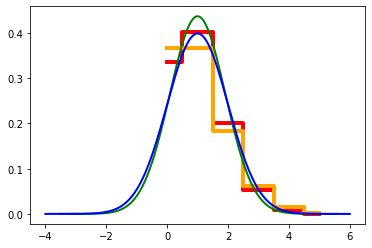

Binomial (red), Poisson (orange), Gaussian with binomial error (green), Gaussian with poisson error (blue) 
for N= 6 p= 0.16666666666666666 ,lambda=mu=N*p= 1.0 ,sigma_b=sqrt(N*p*(1-p))= 0.9128709291752769 ,sigma_p=sqrt(mean)= 1.0


In [14]:
PlotAll(6, 1/6)

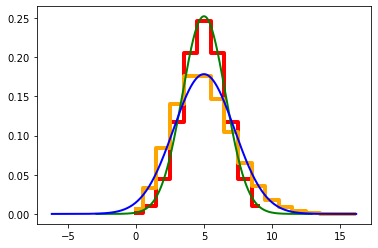

Binomial (red), Poisson (orange), Gaussian with binomial error (green), Gaussian with poisson error (blue) 
for N= 10 p= 0.5 ,lambda=mu=N*p= 5.0 ,sigma_b=sqrt(N*p*(1-p))= 1.5811388300841898 ,sigma_p=sqrt(mean)= 2.23606797749979


In [16]:
PlotAll(10, 0.5)

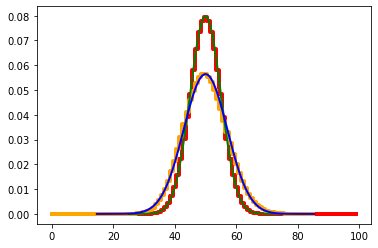

Binomial (red), Poisson (orange), Gaussian with binomial error (green), Gaussian with poisson error (blue) 
for N= 100 p= 0.5 ,lambda=mu=N*p= 50.0 ,sigma_b=sqrt(N*p*(1-p))= 5.0 ,sigma_p=sqrt(mean)= 7.0710678118654755


In [17]:
PlotAll(100, 0.5)

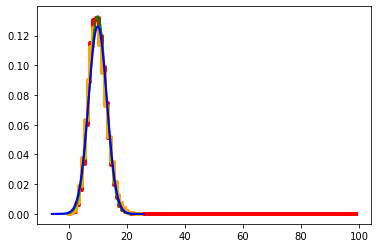

Binomial (red), Poisson (orange), Gaussian with binomial error (green), Gaussian with poisson error (blue) 
for N= 100 p= 0.1 ,lambda=mu=N*p= 10.0 ,sigma_b=sqrt(N*p*(1-p))= 3.0 ,sigma_p=sqrt(mean)= 3.1622776601683795


In [21]:
PlotAll(100, 0.1)